In [0]:
!pip install matplotlib==3.1.0

## Importando as bibliotecas para tratamento dos dados

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error

## Essa função executa as seguintes atividades:

I- Escreve num arquivo .json as informações passadas em "credentials";

II- Baixa o dataset do Kaggle através da API;

III- Puxa o arquivo CSV (Cerveja_consumo.csv) de dentro do arquivo zipado (beer-consumption-sao-paulo.zip).

### Assim, temos as seguintes informações sobre a função:

Entrada - Token do Kaggle e link para download do dataset através da API.

Parâmetros - 

I - Usamos um método de I/O do Python (.open()) para escrever um arquivo json passando os valores em "Credentials".


II- Usamos as tags da API do Kaggle para criar uma pasta e transferir o arquivo "kaggle.json" para ela e uma outra outra pasta para download do dataset "beer-consumption-sao-paulo".

III- Chamamos uma função do zipfile para pegar o arquivo

Saída - Retorna o arquivo dentro do zip como um dataframe.

In [0]:
def get_data():
  import json

  credentials = {"username":"caiodultra","key":"c3edf1c0519e6f4dd83611542c0382dd"}

  !mkdir .kaggle

  with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(credentials, file)

  !cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
  !kaggle config set -n path -v /content/downloads/
  !kaggle datasets download -d dongeorge/beer-consumption-sao-paulo

  from zipfile import ZipFile
  zf = ZipFile('/content/downloads/datasets/dongeorge/beer-consumption-sao-paulo/beer-consumption-sao-paulo.zip') 
  df = pd.read_csv(zf.open('Consumo_cerveja.csv'))

  return df

# Aqui estamos excluindo a coluna ***Data*** do nosso Dataframe e todos os valores nulos (NaN)

In [0]:
df = get_data()
df.drop(['Data'],axis=1,inplace=True)
df.dropna(axis=0,how='all',inplace=True)

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: /content/downloads/
  0% 0.00/5.24k [00:00<?, ?B/s]
100% 5.24k/5.24k [00:00<00:00, 9.03MB/s]


## Aqui converteremos nossos dados do dataframe para dados do tipo **Float**, pois originalmente, nosso dataframe vem dividido entre outros tipos de dado.

In [0]:
float_columns = ['Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)']

for column in float_columns:
  df[column] = df[column].str.replace(',','.').astype(float)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [0]:
df.tail()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467
364,24.76,20.2,29.0,0.0,0.0,22.446


# Aqui usaremos a função ***.corr()*** para trazer a *relação linear* entre as colunas. Quanto mais próximo de 1, maior a relação entre elas. O número 1.00000 sempre estará destacado na própria coluna.

I - A coluna "Temperatura Media (C)" tem uma relação de 0.57 com a coluna Consumo de cerveja (litros);

II- A coluna "Temperatura Minima (C)" tem uma relação de 0.39 com a coluna Consumo de cerveja (litros);

III- A coluna "Temperatura Maxima (C)" tem uma relação de 0.64 com a coluna Consumo de cerveja (litros);

IV- A coluna "Precipitacao (mm)" tem uma relação de -0.19 com a coluna Consumo de cerveja (litros);

V- A coluna 'Final de Semana" tem uma relação de 0.50 com a coluna Consumo de cerveja (litros).

In [0]:
df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


Neste mapa de calor, quanto maior a relação (mais próximo de um) a cor fica mais clara, conforme demonstrado na barra à esquerda do mapa.

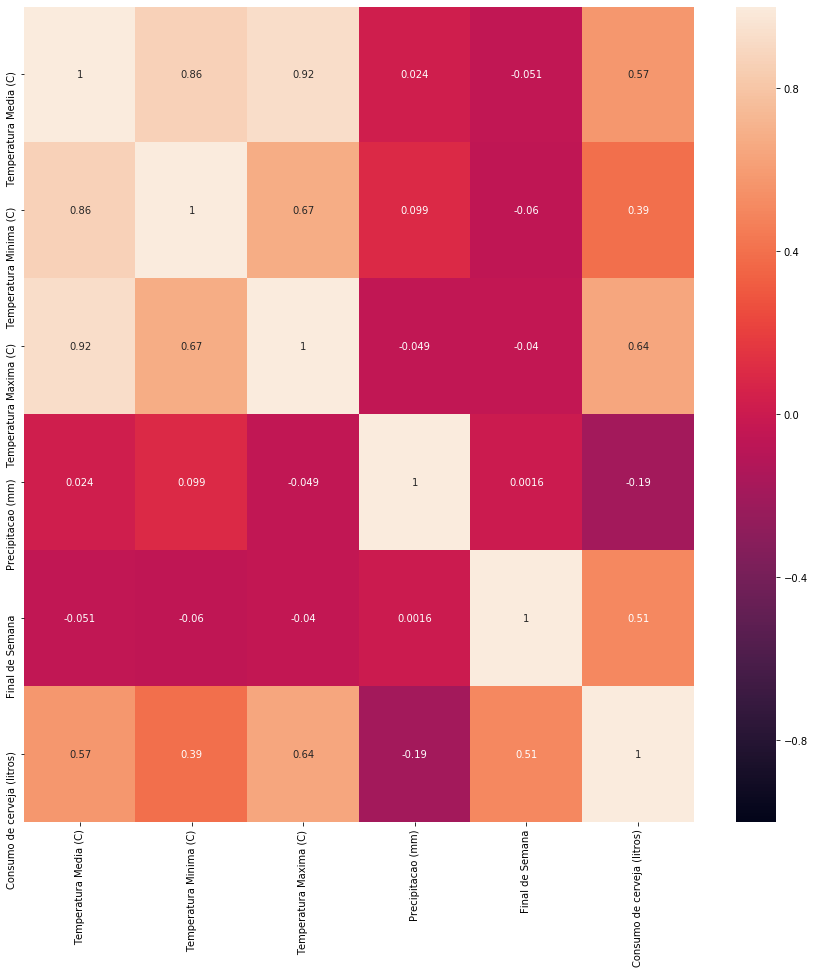

In [0]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1);

Nesse gráfico podemos observar também a relação linear entre as colunas do nosso dataframe. Quanto melhor a relação entre essas essas colunas, o gráfico nos apresenta uma crescente. Como demonstrado por exemplo na relação entre a Temperatura Maxima (C) e o Consumo de cerveja (litros).

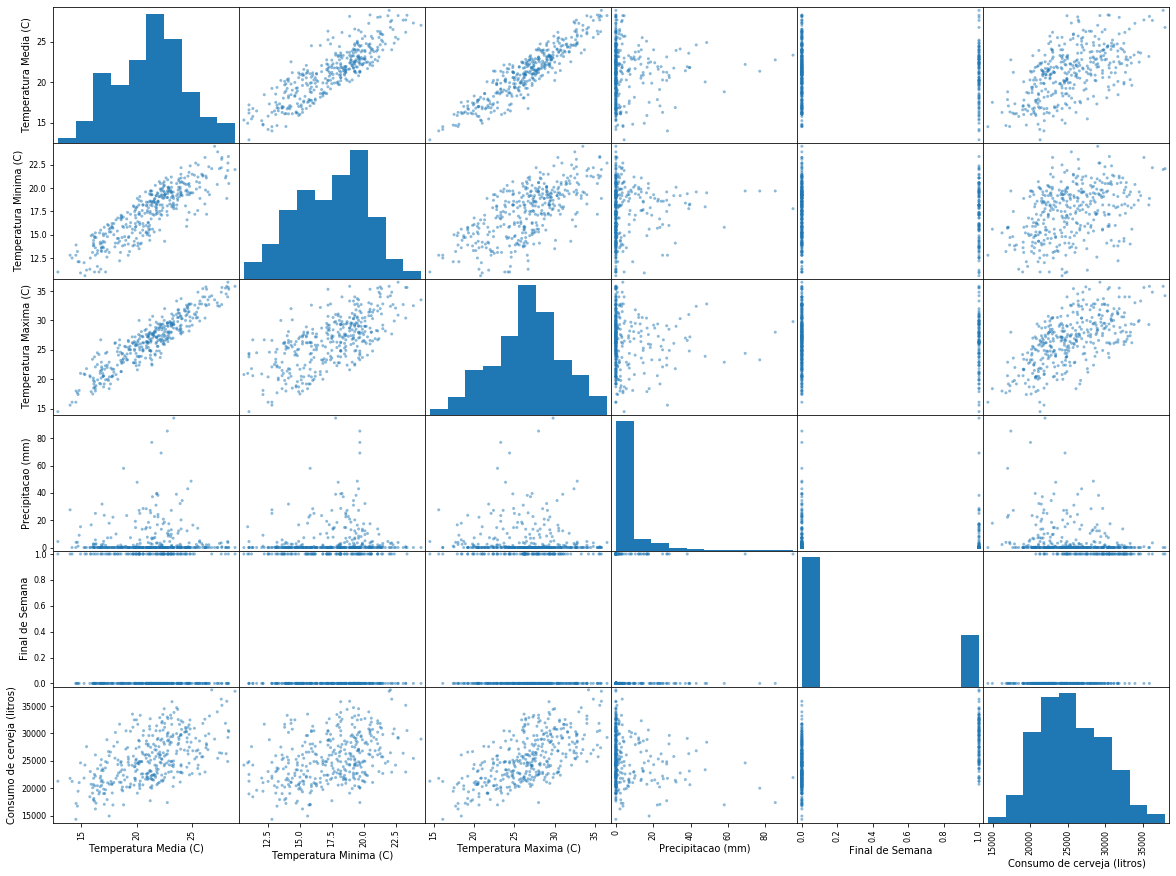

In [0]:
pd.plotting.scatter_matrix(df,figsize=(20,15));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3fd5a3358>,
      dtype=object)

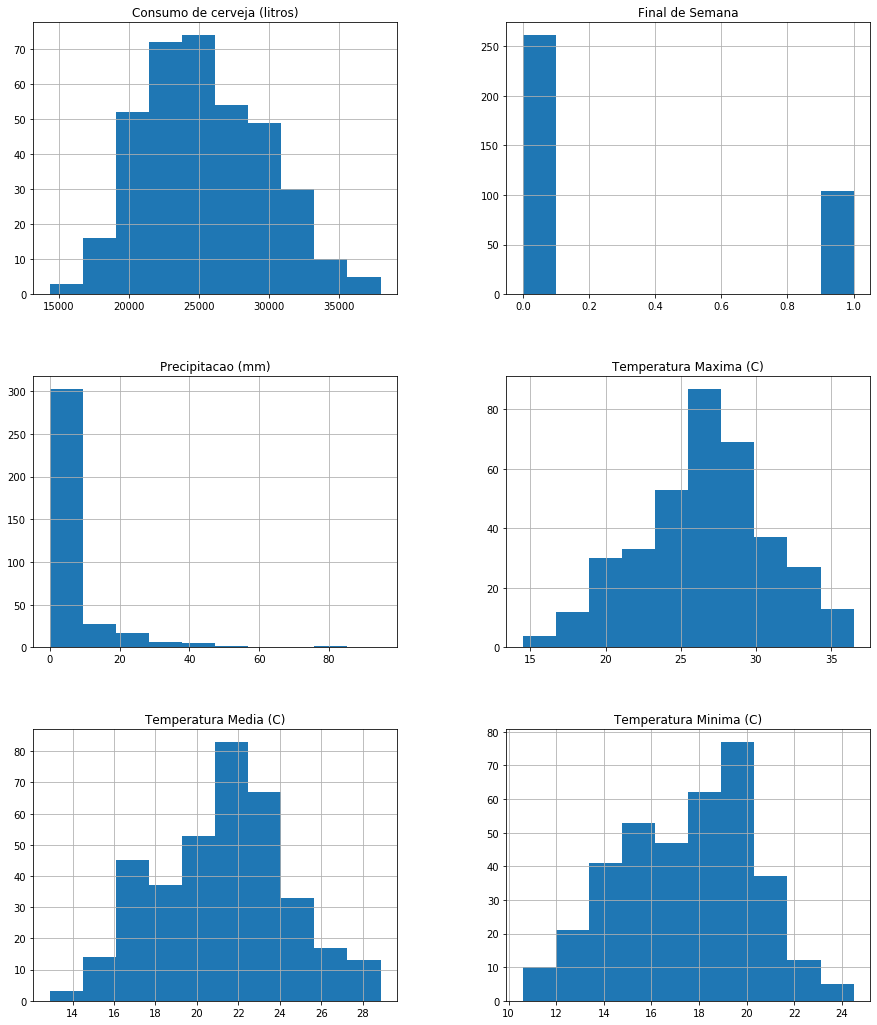

In [0]:
df.hist(figsize = (15, 18))

In [0]:
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


### Ainda no tratamento dos dados, observe acima que a coluna "Consumo de cerveja (litros)" está com os seus valores descritos como dezena (lembrando que anteriormente passamos esses valores para dados do tipo float). No dataset original esta coluna está descrita como milhares de litros e precisamos transformar esses valores de dezena para milhar também.

In [0]:
df['Consumo de cerveja (litros)'] = df['Consumo de cerveja (litros)'] * 1000
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25461.0
1,27.02,24.5,33.5,0.0,0.0,28972.0
2,24.82,22.4,29.9,0.0,1.0,30814.0
3,23.98,21.5,28.6,1.2,1.0,29799.0
4,23.82,21.0,28.3,0.0,0.0,28900.0
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32307.0
361,22.64,21.1,26.7,0.0,0.0,26095.0
362,21.68,20.3,24.1,10.3,0.0,22309.0
363,21.38,19.3,22.4,6.3,0.0,20467.0


# Divisão do Datasets de treino e teste (80%|20% respectivamente)

*Obs: A partir de agora passaremos a chamar as colunas do nosso dataframe de features (características).*

I- Usaremos a função "train_test_split" da library sklearn para isso.

II- Nas variáveis independentes (features) passaremos "Temperatura Minima (C)", "Temperatura Media (C)", "Temperatura Maxima (C)", "Precipitacao (mm) e "Final de Semana" e no eixo Y passaremos "Consumo de cerveja (litros)" ***pois iremos prever o consumo de cerveja em São Paulo relacionando-o à temperatura nos finais de semana e precipitação (chuva).***

In [0]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25461.0
1,27.02,24.5,33.5,0.0,0.0,28972.0
2,24.82,22.4,29.9,0.0,1.0,30814.0
3,23.98,21.5,28.6,1.2,1.0,29799.0
4,23.82,21.0,28.3,0.0,0.0,28900.0


### De 941 linhas, 576 foram deletadas e estas correspondiam à 61.21%. Dado o nosso escopo, os dados que foram deletados não interferem no resultado que planejamos alcançar.

In [0]:
#Dividindo 80% do dataset para treino e 20% para teste
from sklearn.model_selection import train_test_split

X = df[['Temperatura Minima (C)','Temperatura Media (C)','Temperatura Maxima (C)', 'Precipitacao (mm)',  'Final de Semana']].dropna()
y = df[['Consumo de cerveja (litros)']].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [0]:
X_train

,Temperatura Minima (C),Temperatura Media (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
211,12.8,19.24,26.6,0.0,0.0
340,18.0,20.04,23.9,47.8,0.0
202,12.8,14.52,16.1,0.0,0.0
75,18.6,21.92,25.6,24.2,0.0
84,18.3,22.98,29.8,0.0,0.0
...,...,...,...,...,...
71,20.0,22.34,26.6,0.0,0.0
106,18.4,21.42,27.0,37.2,0.0
270,17.5,21.22,23.6,27.2,0.0
348,20.6,25.66,32.8,4.0,0.0


In [0]:
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

## Aplicando a Regressão Linear

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(X_train_array,y_train_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X_test['y_pred'] = lr.predict(X_test_array)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
lr.coef_

array([[ -62.81587287,   96.51350744,  630.68847172,  -43.41427962,
        5147.18828505]])

In [0]:
import plotly.express as px

In [0]:
X_train.head()

,Temperatura Minima (C),Temperatura Media (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
211,12.8,19.24,26.6,0.0,0.0
340,18.0,20.04,23.9,47.8,0.0
202,12.8,14.52,16.1,0.0,0.0
75,18.6,21.92,25.6,24.2,0.0
84,18.3,22.98,29.8,0.0,0.0


# Primeira visualização

I- Podemos observar na função executada no início do kernel que a correlação entre a *Temperatura Minima (C)* e a *Precipitacao (mm)* é baixa; porém

II- Podemos observar no gráfico abaixo que quanto maior a temperatura e menor o volume de precipitação, ***MAIOR será nosso consumo de cerveja.***


In [0]:
fig = px.scatter_3d(X_test, x='Precipitacao (mm)',y='Temperatura Minima (C)',z='y_pred')
fig.show()

# Segunda visualização

I- Aqui podemos observar que quanto maior for nossa temperatura, ***MAIOR será o consumo de cerveja.***

II- Podemos observar também que o consumo de cerveja é consideravelmente maior nos finais de semana.

In [0]:
fig = px.scatter_3d(X_test, x='Final de Semana',y='Temperatura Maxima (C)',z='y_pred')
fig.show()

# Terceira visualização

I- Neste gráfico também podemos observar que quanto maior for nossa temperatura e menor for nosso volume de precipitação, ***MAIOR será o consumo de cerveja.***

II- Semelhante à primeira visualização.

In [0]:
fig = px.scatter_3d(X_test, x='Precipitacao (mm)',y='Temperatura Maxima (C)',z='y_pred')
fig.show()

# Quarta visualização

I- Aqui também podemos observar que quanto menor o for o volume de precipitação, maior será o consumo e o consumo será maior nos finais de semana.

In [0]:
fig = px.scatter_3d(X_test, x='Final de Semana',y='Precipitacao (mm)',z='y_pred')
fig.show()

# Nos gráfico abaixo podemos ver as ***features de temperatura no eixo X*** e a ***reta da nossa predição*** feita no nosso X_test para predição do Consumo de Cerveja.

I- No primeiro gráfico podemos ver que nossa predição não foi tão precisa quanto ao consumo em temperatura máxima, embora haja uma correlação linear entre as features.

II- No segundo e terceiro gráfico, podemos ver que nosso modelo previu melhor o consumo de cerveja em relação a temperatura média e mínima.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



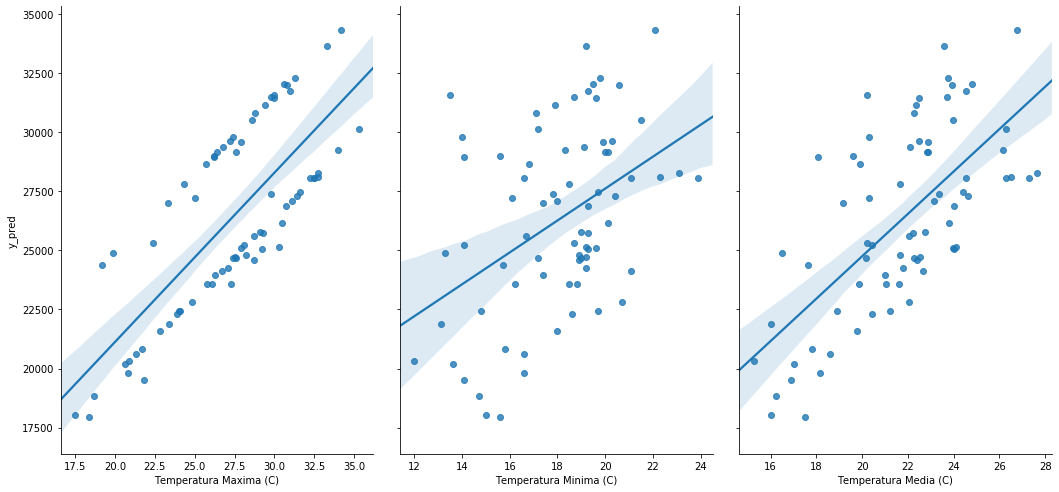

In [0]:
import seaborn as sns
sns.pairplot(X_test, x_vars=['Temperatura Maxima (C)', 'Temperatura Minima (C)', 'Temperatura Media (C)'], y_vars='y_pred', size=7, aspect=0.7, kind='reg')

# Comparando nosso y_true (dados reais) com o y_pre (valores preditos).

Aqui nós podemos visualizar a comparação dos dados reais apresentados ao modelo com o que foi predito por ele.

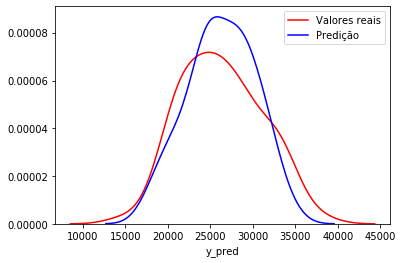

In [0]:
import seaborn as sns

ax1 = sns.distplot(y_test_array, hist=False, color="r", label="Valores reais")
sns.distplot(X_test['y_pred'], hist=False, color="b", label="Predição" , ax=ax1);

# Aplicando métricas após a predição

# R^2

I- Nossa primeira métrica é o R^2 (coeficiente de determinação) que nos dirá se nosso modelo é ou não "eficaz". Quanto mais próximo de 1.0 melhor.

SQt = Soma total dos quadrados

SQr = Soma total dos resíduos (resíduos da predição)

Fórmula: R^2 = SQt - SQr/SQt

Na linha de código executada abaixo podemos ver que o R^2 do teste foi maior do que o do treino. O que significa que o modelo aprendeu bem sem e não teve overfitting (viés alto).

Obs: Dividimos por SQt para normalizar o coeficiente de determinação e padronizá-lo entre valores de 0 à 1. Imaginemos que a reta da predição enquadrou todos os dados. Se isso acontecer, então o SQr será igual a 0. Aplicando a fórmula, SQT/SQT é igual a 1 ou seja, quanto menor o SQr, melhor será o modelo.

In [0]:
lr.score(X_train_array, y_train_array), lr.score(X_test_array,y_test_array)

(0.7104068706547428, 0.7427938181737362)

# Média do Erro Absoluto (MAE) e Erro Quadrático Médio (MSE)

II - Nossa segunda métrica é a média de erros absolutos (Mean Absolute Error  - MAE).

Para o nosso modelo, essa métrica se encaixa melhor pois não precisaremos ser tão minunciosos quantos aos erros.

Caso nosso modelo precisasse considerar o impacto que os erros gerariam no negócio em relação as predições, usaríamos o *erro quadrático médio* (Mean Squared Error) pois elevaríamos os nossos erros ao quadrado e consequentemente, os menores erros teriam um peso considerável em relação à métrica citada anteriormente (MAE).

Usamos esta métrica para avaliar a significância dos erros do nosso modelo.

In [0]:
from sklearn import metrics
print ('Média do erro absoluto: ', metrics.mean_absolute_error(y_test, X_test['y_pred']))

print ('Erro médio quadrático: ', metrics.mean_squared_error(y_test, X_test['y_pred']))

Média do erro absoluto:  2056.408626085899
Erro médio quadrático:  5699451.793236819


## Apresentação de Resultados

Concluímos que o modelo construído consegue trabalhar bem com as features que foram apresentadas e que em relação ao nosso target (Consumo de cerveja (litros)), as features: Temperatura Maxima (C), Final de Semana e Precipitacao (mm) tem um peso maior na predição do consumo de cerveja. Abaixo temos um resumo das conclusões que podemos tirar deste modelo:

I- Quanto maior a temperatura e menor o volume de precipitação, ***MAIOR será nosso consumo de cerveja.***

*A) X = Precipitacao (mm), Temperatura Maxima (C) e Y = Consumo de cerveja (litros)*


II- Quanto maior for nossa temperatura, ***MAIOR será o consumo de cerveja.***

*B) X = Temperatura Maxima (C) e Y = Consumo de cerveja (litros)*


III- Quanto menor for nossa precipitação, maior será nosso consumo de cerveja independente de ser ou não final de semana, porém, o consumo é consideravelmente maior nos fins de semana.

*C) X = Precipitacao (mm), Temperatura Maxima (C), Final de Semana e Y = Consumo de cerveja (litros)*

IV - Amanhã, numa temperatura  de ***30.5°C***, volume de precipitação em ***12.12mm***, provavelmente o consumo de cerveja será de ***26.158lts*** (vinte e seis mil, cento e cinquenta e oito mil litros).